In [445]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

V1481A = np.array([24.36, -17.04, 13.26, 59.44, 45.43, -8.61, -9.37, 20.98, 63.91, -2.29, 55.55])
V1481B = np.array([96.34, 45.27, -43.73, -24.96, 78.60, 82.46, -50.16, 70.06, -37.94])
JD     = np.array([2453658.8320, 2453659.8226, 2453660.8243, 2453661.8003, 2453662.8240, 2453663.8200,
                   2453664.7964, 2453678.7838, 2453679.7282, 2453753.6614, 2453755.6823])
JDB    = np.array([2453659.8226, 2453660.8243, 2453661.8003, 2453662.8240, 2453663.8200,
                   2453664.7964, 2453679.7282, 2453753.6614, 2453755.6823])

DQTau1 = np.array([34.76, -2.93, 37.11, 37.38, 34.73, 31.64, 26.07, 23.51, 20.10, 17.31, 27.28, 36.99, 33.17,
                   35.11, 35.24, 28.81, 12.43, 40.09, 35.14, 35.89, 19.12, 37.08, 36.83, 12.75, -6.27, 14.82,
                   34.84,  3.16, 32.37, 39.09, 17.46, 22.67, 31.34])
DQTau2 = np.array([12.44, 56.13, 13.90, 15.01, 17.06, 20.70, 24.40, 27.30, 25.73, 27.86, 23.67, 7.64, 10.94,
                   09.87, 10.05, 19.93, 33.26, 13.83, 11.47, 16.98, 26.86, 10.20, 14.36, 23.86, 50.94, 37.61,
                   07.51, 52.75, 17.20, 08.27, 34.61, 26.25, 11.49])
HJD    = np.array([45982.0293, 46389.8446, 46745.8122, 47073.9364, 47075.9910, 47078.0084, 47127.8232, 47128.8081,
                   47159.6132, 47159.6318, 47427.9265, 47546.6122, 47546.6272, 47546.6272, 47546.6423, 47789.9412,
                   47840.8048, 47845.8709, 47896.7312, 47898.7686, 47902.6961, 48525.9580, 48670.6445, 48871.9572,
                   49344.8584, 49373.6908, 49410.6311, 49644.8270, 49699.8045, 53693.8806, 56578.9704, 56606.9106,
                   56650.8257])
#phase  = np.array([0.1435, 0.9520, 0.4794, 0.2446, 0.3747, 0.5023, 0.6549, 0.7172, 0.6667, 0.6679, 0.6468, 0.1579,
#                   0.1588, 0.1588, 0.1598, 0.5569, 0.7758, 0.0964, 0.3151, 0.4440, 0.6926, 0.1356, 0.2920, 0.0321,
#                   0.9596, 0.7842, 0.1220, 0.9430, 0.4223, 0.1867, 0.7691, 0.5373, 0.3164])
# These phases are those calculated by Czekala, et al.

In [446]:
#the below cell converts the time of a measurement into the phase of a measurement, from known T and P
#needed before the plot is made, but cannot be done until parameter fit is foun

def phases(times): #function converts time measurements in time into measurements in orbital phase from 0-1
    timePhases = np.zeros(times.size) #function is only useful after T and P have been determined
    for i in range(0, times.size):
        timePhases[i] = ((times[i])-T)/P-int(((times[i])-T)/P)
        if timePhases[i] < 0:
            timePhases[i] = timePhases[i]+1
    return timePhases

In [447]:
#This cell is a python clone of the relevant portion of helio_RV.pro from the NASA IDL Library
#It is an implementation of of a procedure described in 'Double Stars' by Wulff D. Heintz

def rv(K, P, T, e, w, y, t): #function generates RV values plot from given parameters
    # t is some value of time, ultimately the independent variable, can bea single value or an array
    M = (2*np.pi/P)*(t) #Mean Anomaly is a function of time
    E1 = M + e*np.sin(M) + ((e**2)*np.sin(2*M)/2) #Eccentric Anomaly is a function of Mean Anomaly
    while True:
        E0 = E1
        M0 = E0 - e*np.sin(E0)
        E1 = E0 +(M-M0)/(1-e*np.cos(E0))
        if np.amax(E1-E0) < 1E-9:
            break
    nu = 2*np.arctan(np.sqrt((1 + e)/(1 - e))*np.tan(E1/2)) #True Anomaly is a function of Eccentric anomaly
    rv = K*(np.cos(nu+w) + (e*np.cos(w)))+y
    return rv

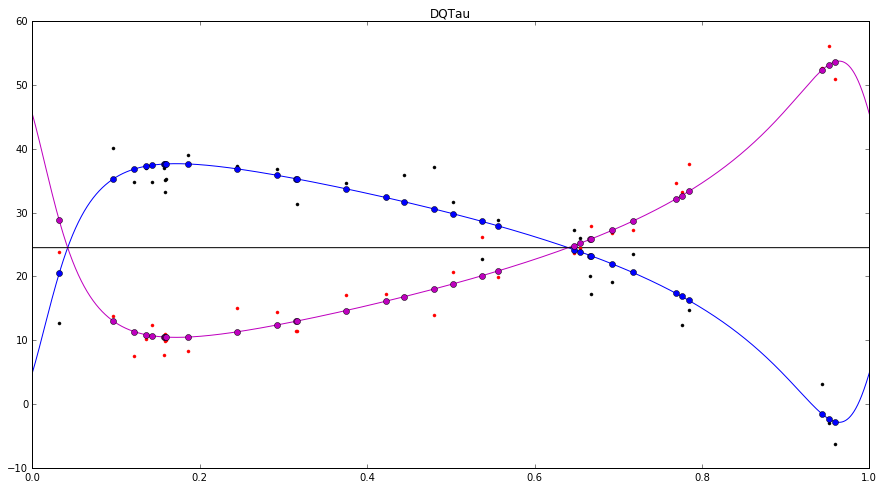

In [448]:
#These parameters are shared by the entire system, DQTau

P = 15.80158 #period in days determined first via periodogram
T = 47433.507 #Time offset in days, boils down to a horizontal shift in RV. T is the 'zero' point
e = 0.568 #eccentricity (unitless)
w = 4.047 #longitude of periastron in radians
y = 24.52 #systemic velocity in km/s

#these parameters are star specific
K1= 20.28 #semamplitude in km/s
K2= -21.66

plt.figure(figsize=(15,8))
plt.plot(np.linspace(0, P, num = 10000)/P, rv(K1, P, T, e, w, y, np.linspace(0, P, num = 10000)))
plt.plot(np.linspace(0, P, num = 10000)/P, rv(K2, P, T, e, w, y, np.linspace(0, P, num = 10000)), 'm')
plt.plot(np.linspace(0, P, num = 10000)/P, y*np.ones(t.size), 'k')
plt.plot(phases(HJD), DQTau1, 'k.')
plt.plot(phases(HJD), DQTau2, 'r.')
plt.plot(phases(HJD), rv(K1, P, T, e, w, y, phases(HJD)*P), 'bo')
plt.plot(phases(HJD), rv(K2, P, T, e, w, y, phases(HJD)*P), 'mo')
plt.xlim(0,1)
plt.title('DQTau')

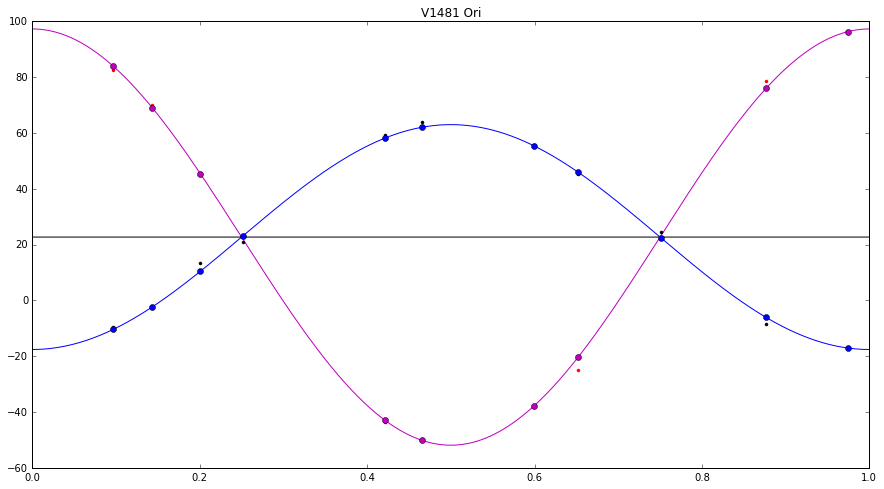

In [449]:
#Now for V1481 Ori

P = 4.433 #period in days determined first via periodogram
T = 3.3 #Time offset in days, boils down to a horizontal shift in RV. T is the 'zero' point
e = 0 #eccentricity (unitless)
w = 0 #longitude of periastron in radians
y = 22.7 #systemic velocity in km/s

#these parameters are star specific
K1= -40.3 #semamplitude in km/s
K2= 74.6

plt.figure(figsize=(15,8))
plt.plot(np.linspace(0, P, num = 10000)/P, rv(K1, P, T, e, w, y, np.linspace(0, P, num = 10000)))
plt.plot(np.linspace(0, P, num = 10000)/P, rv(K2, P, T, e, w, y, np.linspace(0, P, num = 10000)), 'm')
plt.plot(np.linspace(0, P, num = 10000)/P, y*np.ones(t.size), 'k')
plt.plot(phases(JD), V1481A, 'k.')
plt.plot(phases(JDB), V1481B, 'r.')
plt.plot(phases(JD), rv(K1, P, T, e, w, y, phases(JD)*P), 'bo')
plt.plot(phases(JDB), rv(K2, P, T, e, w, y, phases(JDB)*P), 'mo')
plt.xlim(0,1)
plt.title('V1481 Ori')

The plotter is basically done, below this point I move into quantifying the error of the fit, so it may be properly minimized.

In [397]:
#naive brute force approach, checks all possible combinations DOES NOT WORK, TOO MEMORY INTENSIVE
T = np.arange(45982.0293,56650.8257,0.0001) #earliest to latest
e = np.arange(0,0.999,0.001) # 0 <= e < 1
w = np.arange(0,2*np.pi-0.001,0.001) # 0 <= w < 2*pi
y = np.arange(-6.27,56.13,0.01) #smallest velocity to largest
K1= np.arange(0,31.2,0.01) #from 0 to half of systemic velocity range
K2= np.arange(-31.2,0,0.01) #same as above, but negative
error = np.empty([T.size, e.size, w.size, y.size, K1.size, K2.size])
for i in range(T.size):
    for j in range(e.size):
        for k in range(w.size):
            for l in range(y.size):
                for m in range(K1.size):
                    for n in range(K2.size):
                        error[i,j,k,l,m,n]=(np.sum(np.sqrt((DQTau1-rv(K1, P, T, e, w, y, HJD))**2))+
                                            np.sum(np.sqrt((DQTau2-rv(K2, P, T, e, w, y, HJD))**2)))

ValueError: array is too big.